In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_raw = pd.read_csv('/content/data_test.csv', delimiter=None, header=None, skiprows=1)

*Обработка сырых данных, получение нового df*

In [ ]:
df_raw[['event_id', 'fullname_1', 'fullname_2']] = df_raw[0].str.split(";", n=3, expand=True)
df =  df_raw[['event_id', 'fullname_1', 'fullname_2']]

In [ ]:
df

,event_id,fullname_1,fullname_2
0,189,Галчевская Карина Владимировна,Белоновская Анастасия Семеновна
1,206,Офицеров Олег Романович,Сапожник Борис Валерьевич
2,445,Жандарова Лариса Германовна,Чемодуров Дамир Русланович
3,503,Масимова Яна Дамировна,Мингажетдинов Рамиль Семенович
4,571,Мухтарова Алена Яковлевна,Щербатенко Ольга Робертовна
...,...,...,...
4995,999333,Осташов Владимир Данилович,Чалов Илья Владимирович
4996,999360,Гандыбина Любовь Александровна,Мерлин Илья Юрьевич
4997,999403,Востоков Виктор Ильдарович,Аликас Никита Андреевич
4998,999405,Огарева Людмила Ильдаровна,Нагайцева Алина Степановна


*Поиск явных и неявных дубликатов*

In [ ]:
df[df.duplicated() == True]

,event_id,fullname_1,fullname_2


In [ ]:
df.describe()

,event_id,fullname_1,fullname_2
count,5000,5000,5000
unique,4985,4930,4994
top,850472,Ахромеева Алина Ивановна,Медведева Дарья Алексеевна
freq,2,49,5


In [ ]:
def find_duplicated(df):
  for column in df.columns:
    duplicates = df[df[column].duplicated(keep=False)]
    print(f"-----------------Выводим дубликаты из {column}---------------------")
    display(duplicates)
    print(f"-------Выводим уникальные значения из {column} с дубликатами-------")
    print(duplicates[column].value_counts())

In [ ]:
find_duplicated(df)

-----------------Выводим дубликаты из event_id---------------------


,event_id,fullname_1,fullname_2
366,70049,Яшина Полина Евгеньевна,Герасимовская Ксения Дамировна
367,70049,Федова Анжелика Вадимовна,Вальдовский Альберт Ефимович
486,92995,Журик Альберт Евгеньевич,Бадьянова Римма Максимовна
487,92995,Кучеренко Ирина Ильинична,Болтик Григорий Максимович
597,117280,Волынский Кирилл Федорович,Гайсумов Виктор Тимурович
598,117280,Уточкин Евгений Анатольевич,Каганович Лилия Петровна
899,177407,Зелинский Геннадий Артурович,Зазорин Вадим Аркадьевич
900,177407,Бужанинов Руслан Артурович,Сороковой Герман Маратович
1798,358194,Ноева Галина Степановна,Серпухова Алла Ярославовна
1799,358194,Долгих Лилия Вадимовна,Брусенцова Дарья Михаиловна


-------Выводим уникальные значения из event_id с дубликатами-------
70049     2
92995     2
117280    2
177407    2
358194    2
390312    2
523688    2
551592    2
613539    2
716489    2
765223    2
850472    2
873359    2
938764    2
985851    2
Name: event_id, dtype: int64
-----------------Выводим дубликаты из fullname_1---------------------


,event_id,fullname_1,fullname_2
221,42389,Ахромеева Алина Ивановна,Ящукова Любовь Ефимовна
275,53707,Ахромеева Алина Ивановна,Тяжлов Ринат Владиславович
308,59801,Ахромеева Алина Ивановна,Соломеина Кристина Георгиевна
320,61824,Ахромеева Алина Ивановна,Дудыкина Мария Романовна
344,66267,Башнина Антонина Глебовна,Павлючиков Максим Филиппович
...,...,...,...
4370,875321,Шолохов Игорь Робертович,Нагайцева Анжелика Яновна
4392,879195,Ахромеева Алина Ивановна,Салагаев Иван Рамилевич
4424,885195,Диомидов Игорь Ильдарович,Карсанов Дамир Тимурович
4540,906600,Диомидов Игорь Ильдарович,Тиктинская Галина Григорьевна


-------Выводим уникальные значения из fullname_1 с дубликатами-------
Ахромеева Алина Ивановна      49
Башнина Антонина Глебовна     14
Диомидов Игорь Ильдарович      5
Зимнухова Карина Даниловна     4
Пафомова Кира Вадимовна        2
Шолохов Игорь Робертович       2
Name: fullname_1, dtype: int64
-----------------Выводим дубликаты из fullname_2---------------------


,event_id,fullname_1,fullname_2
453,87253,Кондратьев Борис Германович,Медведева Дарья Алексеевна
552,109281,Безгачий Денис Ефимович,Медведева Дарья Алексеевна
989,196243,Помыкалова Тамара Федоровна,Медведева Дарья Алексеевна
1109,218462,Шолохов Игорь Робертович,Двигубская Валентина Геннадьевна
1631,327044,Дуброва Анжелика Григорьевна,Медведева Дарья Алексеевна
2882,580478,Пчелинцев Артур Глебович,Медведева Дарья Алексеевна
3760,750824,Торгунаков Роман Кириллович,Шолохов Игорь Робертович
4012,798803,Дорожкин Анатолий Егорович,Двигубская Валентина Геннадьевна
4169,829652,Пафомова Кира Вадимовна,Шолохов Игорь Робертович


-------Выводим уникальные значения из fullname_2 с дубликатами-------
Медведева Дарья Алексеевна          5
Двигубская Валентина Геннадьевна    2
Шолохов Игорь Робертович            2
Name: fullname_2, dtype: int64


*Разделяем fullname на last_name	first_name	middle_name*

In [ ]:
def split_fullname(df, columns):
    for column in columns:
        df[[f"last_name_{column[-1]}", f"first_name_{column[-1]}", f"middle_name_{column[-1]}"]] = df[column].str.split(" ", expand=True)
    return df

In [ ]:
df = split_fullname(df, ['fullname_1', 'fullname_2'])

In [ ]:
df

,event_id,fullname_1,fullname_2,last_name_1,first_name_1,middle_name_1,last_name_2,first_name_2,middle_name_2
0,189,Галчевская Карина Владимировна,Белоновская Анастасия Семеновна,Галчевская,Карина,Владимировна,Белоновская,Анастасия,Семеновна
1,206,Офицеров Олег Романович,Сапожник Борис Валерьевич,Офицеров,Олег,Романович,Сапожник,Борис,Валерьевич
2,445,Жандарова Лариса Германовна,Чемодуров Дамир Русланович,Жандарова,Лариса,Германовна,Чемодуров,Дамир,Русланович
3,503,Масимова Яна Дамировна,Мингажетдинов Рамиль Семенович,Масимова,Яна,Дамировна,Мингажетдинов,Рамиль,Семенович
4,571,Мухтарова Алена Яковлевна,Щербатенко Ольга Робертовна,Мухтарова,Алена,Яковлевна,Щербатенко,Ольга,Робертовна
...,...,...,...,...,...,...,...,...,...
4995,999333,Осташов Владимир Данилович,Чалов Илья Владимирович,Осташов,Владимир,Данилович,Чалов,Илья,Владимирович
4996,999360,Гандыбина Любовь Александровна,Мерлин Илья Юрьевич,Гандыбина,Любовь,Александровна,Мерлин,Илья,Юрьевич
4997,999403,Востоков Виктор Ильдарович,Аликас Никита Андреевич,Востоков,Виктор,Ильдарович,Аликас,Никита,Андреевич
4998,999405,Огарева Людмила Ильдаровна,Нагайцева Алина Степановна,Огарева,Людмила,Ильдаровна,Нагайцева,Алина,Степановна


*Обрабатваем отчества, тем самым определяем gender*

In [ ]:
def determine_gender(df, columns):
    for col in columns:
        # создаем новую колонку для пола
        df[f"gender_{col[-1]}"] = df[col].apply(lambda x: 'male' if x.endswith(('ович', 'евич', 'ич', 'ев')) else ('female' if x.endswith(('овна', 'евна', 'ична', 'инична')) else 'unknown'))
    return df

In [ ]:
df = determine_gender(df, ['middle_name_1', 'middle_name_2'])

In [ ]:
df['gender1_gender2'] = df.apply(lambda row: f"{row['gender_1']}_{row['gender_2']}", axis=1)

In [ ]:
df['gender_1'].value_counts()

female    2555
male      2445
Name: gender_1, dtype: int64

In [ ]:
df['gender_2'].value_counts()

male      2589
female    2411
Name: gender_2, dtype: int64

*Строим круговую диаграмму, которая показывает расспределение гендера в df*

In [ ]:
import matplotlib.pyplot as plt

def plot_gender_pie(df, gender1, gender2,gender_combo):
    # Подсчет количества мужчин и женщин в колонке
    gender_counts = df[gender1].value_counts()
    explode = (0.1, 0)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(gender_counts, explode=explode, labels=gender_counts.index, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title(f'Gender distribution in {gender1}')
    plt.show()
    
    gender_counts = df[gender2].value_counts()

    fig1, ax1 = plt.subplots()
    ax1.pie(gender_counts, explode=explode, labels=gender_counts.index, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title(f'Gender distribution in {gender2}')
    plt.show()
    
    gender_counts = df[gender_combo].value_counts()

    fig1, ax1 = plt.subplots()
    explode = tuple([0.1 if i == 0 else 0 for i in range(len(gender_counts))])
    ax1.pie(gender_counts, explode=explode, labels=gender_counts.index, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title(f'Gender distribution in {gender_combo}')
    plt.show()


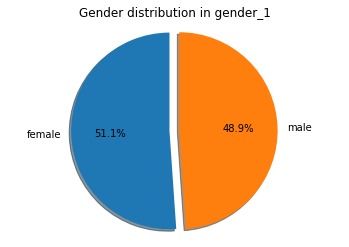

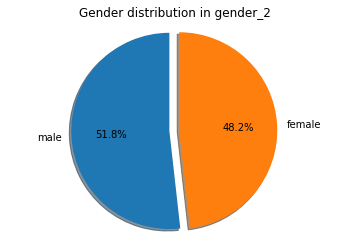

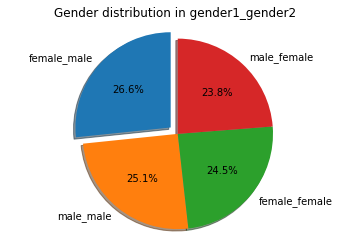

In [ ]:
plot_gender_pie(df, 'gender_1', 'gender_2', 'gender1_gender2')

In [ ]:
df

,event_id,fullname_1,fullname_2,last_name_1,first_name_1,middle_name_1,last_name_2,first_name_2,middle_name_2,gender_1,gender_2,gender1_gender2
0,189,Галчевская Карина Владимировна,Белоновская Анастасия Семеновна,Галчевская,Карина,Владимировна,Белоновская,Анастасия,Семеновна,female,female,female_female
1,206,Офицеров Олег Романович,Сапожник Борис Валерьевич,Офицеров,Олег,Романович,Сапожник,Борис,Валерьевич,male,male,male_male
2,445,Жандарова Лариса Германовна,Чемодуров Дамир Русланович,Жандарова,Лариса,Германовна,Чемодуров,Дамир,Русланович,female,male,female_male
3,503,Масимова Яна Дамировна,Мингажетдинов Рамиль Семенович,Масимова,Яна,Дамировна,Мингажетдинов,Рамиль,Семенович,female,male,female_male
4,571,Мухтарова Алена Яковлевна,Щербатенко Ольга Робертовна,Мухтарова,Алена,Яковлевна,Щербатенко,Ольга,Робертовна,female,female,female_female
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,999333,Осташов Владимир Данилович,Чалов Илья Владимирович,Осташов,Владимир,Данилович,Чалов,Илья,Владимирович,male,male,male_male
4996,999360,Гандыбина Любовь Александровна,Мерлин Илья Юрьевич,Гандыбина,Любовь,Александровна,Мерлин,Илья,Юрьевич,female,male,female_male
4997,999403,Востоков Виктор Ильдарович,Аликас Никита Андреевич,Востоков,Виктор,Ильдарович,Аликас,Никита,Андреевич,male,male,male_male
4998,999405,Огарева Людмила Ильдаровна,Нагайцева Алина Степановна,Огарева,Людмила,Ильдаровна,Нагайцева,Алина,Степановна,female,female,female_female


*Выводы:*
*   При помощи визуалного анализа было обнаружено, что некоторые отчества повторяются и являются уникальными Примерно половину всех данных составили связи ж-м
*   Они могут быть родственниками по брачной линии (например, отец и дочь, мать и сын, брат и сестра) или по родственной линии (например, дядя и племянник, тетя и племянница, дедушка и внучка). 
*   Оставшиеся  связи м-м, ж-ж, могут быть двумя двоюродными сестрами/двумя братьями или двумя племянницами/племянниками одного пола.







# **Поиск уникальных мужских имен и отчеств**
---



In [80]:
# получить уникальные имена из first_name_1 и first_name_2
unique_names = df[['first_name_1', 'first_name_2']].values.ravel('K')
unique_names = pd.unique(unique_names)
# фильтровать имена по gender_1 == 'male' или gender_2 == 'male'
male_names = [name for name in unique_names if (df[(df['first_name_1'] == name) | (df['first_name_1'] == name)]['gender_1'].iloc[0] == 'male') or (df[(df['first_name_2'] == name) | (df['first_name_2'] == name)]['gender_2'].iloc[0] == 'male')]
# вывести результат
print(male_names[:20])

['Олег', 'Владимир', 'Андрей', 'Кирилл', 'Вадим', 'Александр', 'Юрий', 'Глеб', 'Роберт', 'Артем', 'Рамиль', 'Артур', 'Вячеслав', 'Яков', 'Егор', 'Тимур', 'Федор', 'Иван', 'Филипп', 'Ян']


In [ ]:
len(male_names)

66

In [ ]:
male_names.sort()

In [81]:
print(male_names[:20])

['Олег', 'Владимир', 'Андрей', 'Кирилл', 'Вадим', 'Александр', 'Юрий', 'Глеб', 'Роберт', 'Артем', 'Рамиль', 'Артур', 'Вячеслав', 'Яков', 'Егор', 'Тимур', 'Федор', 'Иван', 'Филипп', 'Ян']


In [82]:
import pandas as pd
import editdistance

# Определяем функцию для поиска похожих отчеств
def find_similar_middle_names(names, max_distance=5):
    """
    Функция для поиска похожих отчеств с использованием расстояния Левенштейна.

    :param names: список уникальных отчеств
    :param max_distance: максимальное расстояние Левенштейна для считать отчество похожим
    :return: список похожих отчеств
    """
    similar_names = set()
    for i, name1 in enumerate(names):
        for j, name2 in enumerate(names):
            if i != j and editdistance.eval(name1, name2) <= max_distance:
                similar_names.add(name1)
                similar_names.add(name2)
    return list(similar_names)

# Объединяем столбцы в один
unique_middle_names = df[['middle_name_1', 'middle_name_2']].values.ravel('K')

# Удаляем дубликаты
unique_middle_names = pd.unique(unique_middle_names)

# Находим похожие отчества
similar_middle_names = find_similar_middle_names(unique_middle_names)

# Выводим результат
print(similar_middle_names[:20])

['Ярославович', 'Рамилевна', 'Романовна', 'Михаиловна', 'Сергеевич', 'Анатольевна', 'Егоровна', 'Романович', 'Семенович', 'Максимовна', 'Евгеньевич', 'Антонович', 'Геннадьевна', 'Никитовна', 'Ильинична', 'Витальевна', 'Максимович', 'Степановна', 'Геннадьевич', 'Георгиевна']


In [ ]:
similar_middle_names.sort()

In [83]:
print(similar_middle_names[:20])

['Ярославович', 'Рамилевна', 'Романовна', 'Михаиловна', 'Сергеевич', 'Анатольевна', 'Егоровна', 'Романович', 'Семенович', 'Максимовна', 'Евгеньевич', 'Антонович', 'Геннадьевна', 'Никитовна', 'Ильинична', 'Витальевна', 'Максимович', 'Степановна', 'Геннадьевич', 'Георгиевна']


In [ ]:
similar_middle_names_men = similar_middle_names[::2]

In [ ]:
similar_middle_names_women = similar_middle_names[1::2]

In [ ]:
len(similar_middle_names_men)

66

In [ ]:
len(similar_middle_names_men) == len(male_names)

True

Таким образом подтверждается моя гипотеза о том, что все отчества образованы от одних и тех же уникальных имен 

In [ ]:
df_names = pd.DataFrame({
    'имя': male_names,
    'отчество_м': similar_middle_names_men,
    'отчество_ж': similar_middle_names_women
})

print(df_names)

          имя     отчество_м     отчество_ж
0   Александр  Александрович  Александровна
1     Алексей     Алексеевич     Алексеевна
2     Альберт    Альбертович    Альбертовна
3    Анатолий    Анатольевич    Анатольевна
4      Андрей      Андреевич      Андреевна
..        ...            ...            ...
61     Эдуард     Эдуардович     Эдуардовна
62       Юрий        Юрьевич        Юрьевна
63       Яков        Яковлев      Яковлевна
64         Ян         Янович         Яновна
65    Ярослав    Ярославович    Ярославовна

[66 rows x 3 columns]


# **Поиск пар однофамильцев одного пола**

In [87]:
dict_list = df_names.to_dict(orient='records')
# Создаем словарь, ключами будут значения из столбца "имя",а значениями - списки из значений столбцов "отчество_м" и "отчество_ж"
result_dict = {}
for item in dict_list:
    result_dict[item['имя']] = [item['отчество_м'], item['отчество_ж']]
print(result_dict)

{'Александр': ['Александрович', 'Александровна'], 'Алексей': ['Алексеевич', 'Алексеевна'], 'Альберт': ['Альбертович', 'Альбертовна'], 'Анатолий': ['Анатольевич', 'Анатольевна'], 'Андрей': ['Андреевич', 'Андреевна'], 'Антон': ['Антонович', 'Антоновна'], 'Аркадий': ['Аркадьевич', 'Аркадьевна'], 'Артем': ['Артемович', 'Артемовна'], 'Артур': ['Артурович', 'Артуровна'], 'Борис': ['Борисович', 'Борисовна'], 'Вадим': ['Вадимович', 'Вадимовна'], 'Валентин': ['Валентинович', 'Валентиновна'], 'Валерий': ['Валерьевич', 'Валерьевна'], 'Василий': ['Васильевич', 'Васильевна'], 'Виктор': ['Викторович', 'Викторовна'], 'Виталий': ['Витальевич', 'Витальевна'], 'Владимир': ['Владимирович', 'Владимировна'], 'Владислав': ['Владиславович', 'Владиславовна'], 'Вячеслав': ['Вячеславович', 'Вячеславовна'], 'Геннадий': ['Геннадьевич', 'Геннадьевна'], 'Георгий': ['Георгиевич', 'Георгиевна'], 'Герман': ['Германович', 'Германовна'], 'Глеб': ['Глебович', 'Глебовна'], 'Григорий': ['Григорьевич', 'Григорьевна'], 'Дами

*Добавляем в df столбцы с parent_name (имя,из которого образовывается отчество)*

In [ ]:
def find_father(df, columns):
    for col in columns:
        # создаем новую колонку для имени отца
        df[f"parent_name_{col[-1]}"] = df[col].apply(lambda x: next(key for key, value in result_dict.items() if x in value)) # Функция принимает значение x (отчество) и ищет ключ словаря, который содержит это значение в списке своих значений, используя генератор списков и функцию next(). Найденный ключ затем возвращается и сохраняется в новой колонке parent_name.
    return df

In [ ]:
df

,event_id,fullname_1,fullname_2,last_name_1,first_name_1,middle_name_1,last_name_2,first_name_2,middle_name_2,gender_1,gender_2,gender1_gender2
0,189,Галчевская Карина Владимировна,Белоновская Анастасия Семеновна,Галчевская,Карина,Владимировна,Белоновская,Анастасия,Семеновна,female,female,female_female
1,206,Офицеров Олег Романович,Сапожник Борис Валерьевич,Офицеров,Олег,Романович,Сапожник,Борис,Валерьевич,male,male,male_male
2,445,Жандарова Лариса Германовна,Чемодуров Дамир Русланович,Жандарова,Лариса,Германовна,Чемодуров,Дамир,Русланович,female,male,female_male
3,503,Масимова Яна Дамировна,Мингажетдинов Рамиль Семенович,Масимова,Яна,Дамировна,Мингажетдинов,Рамиль,Семенович,female,male,female_male
4,571,Мухтарова Алена Яковлевна,Щербатенко Ольга Робертовна,Мухтарова,Алена,Яковлевна,Щербатенко,Ольга,Робертовна,female,female,female_female
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,999333,Осташов Владимир Данилович,Чалов Илья Владимирович,Осташов,Владимир,Данилович,Чалов,Илья,Владимирович,male,male,male_male
4996,999360,Гандыбина Любовь Александровна,Мерлин Илья Юрьевич,Гандыбина,Любовь,Александровна,Мерлин,Илья,Юрьевич,female,male,female_male
4997,999403,Востоков Виктор Ильдарович,Аликас Никита Андреевич,Востоков,Виктор,Ильдарович,Аликас,Никита,Андреевич,male,male,male_male
4998,999405,Огарева Людмила Ильдаровна,Нагайцева Алина Степановна,Огарева,Людмила,Ильдаровна,Нагайцева,Алина,Степановна,female,female,female_female


In [84]:
# создание Series с фамилиями
surname_series = pd.concat([df['fullname_1'].str.split(expand=True)[0], df['fullname_2'].str.split(expand=True)[0]])

# получение списка уникальных фамилий
unique_surnames = surname_series.unique().tolist()

print(unique_surnames[:20])

['Галчевская', 'Офицеров', 'Жандарова', 'Масимова', 'Мухтарова', 'Русских', 'Федонкина', 'Чернолусская', 'Оранский', 'Ардатов', 'Рифтин', 'Балог', 'Голиборода', 'Слободяникова', 'Вахрушкова', 'Сероштанов', 'Канева', 'Маркидонов', 'Гаглоева', 'Скулкин']


In [ ]:
last_name_series = pd.concat([df['fullname_1'].str.split(expand=True)[0], df['fullname_2'].str.split(expand=True)[0]]).reset_index(drop=True)
first_name_series = pd.concat([df['fullname_1'].str.split(expand=True)[1], df['fullname_2'].str.split(expand=True)[1]]).reset_index(drop=True)

new_df = pd.DataFrame({'last_name': last_name_series, 'first_name': first_name_series})


In [ ]:
new_sorted = new_df['last_name'].value_counts()[new_df['last_name'].value_counts() > 1]
print(new_sorted)

Ахромеева     50
Башнина       15
Медведева      6
Зимнухова      6
Диомидов       5
              ..
Доскалиева     2
Чилюшкина      2
Глебов         2
Лупирыба       2
Глушнев        2
Name: last_name, Length: 851, dtype: int64


In [79]:
last_names = new_sorted.index.tolist()
print(last_names[:20])

['Ахромеева', 'Башнина', 'Медведева', 'Зимнухова', 'Диомидов', 'Арциховский', 'Евтюгина', 'Двигубская', 'Шолохов', 'Шаройко', 'Бычек', 'Ордашев', 'Акимжанов', 'Пшеничный', 'Бастун', 'Близнецов', 'Маевская', 'Нагайцева', 'Балалуев', 'Пафомова']


In [ ]:
unique_last_names = new_df['last_name'].unique()

In [ ]:
unique_last_names.sort()

In [ ]:
print(unique_last_names)

['Абабкова' 'Абагинский' 'Абазадзе' ... 'Яшутина' 'Ящук' 'Ящукова']


***Сгрупировать по фамилиям***

In [ ]:
grouped =  new_df[new_df['last_name'].isin(last_names)].groupby('last_name')

In [ ]:
"""for name, group in grouped:
    print(name)
    print(group)"""

'for name, group in grouped:\n    print(name)\n    print(group)'

***Установка пакетов***

In [ ]:
pip install neo4j-driver


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00


# **Поиск пар однофамильцев с разным полом**

In [75]:
import Levenshtein
last_name_pairs = []
for i in range(len(unique_last_names)):
    for j in range(i+1, len(unique_last_names)):
        distance = Levenshtein.distance(unique_last_names[i], unique_last_names[j])
        if distance == 1 and (unique_last_names[i].startswith(unique_last_names[j][:-1]) or unique_last_names[j].startswith(unique_last_names[i][:-1])):
            last_name_pairs.append((unique_last_names[i], unique_last_names[j]))

print(last_name_pairs[:10])

[('Абанин', 'Абанина'), ('Абациев', 'Абациева'), ('Абдеев', 'Абдеева'), ('Абдиров', 'Абдирова'), ('Абдулин', 'Абдулина'), ('Абенов', 'Абенова'), ('Автухов', 'Автухова'), ('Айдамиров', 'Айдамирова'), ('Акимжанов', 'Акимжанова'), ('Аксенцев', 'Аксенцева')]


# **Подключение к Neo4j**
Создлание связей между узлами

In [ ]:
from neo4j import GraphDatabase, basic_auth

# Подключение к базе данных
driver = GraphDatabase.driver(
  "neo4j://3.83.149.211:7687",
  auth=basic_auth("neo4j", "conveniences-chapters-amplifier"))

def create_person_node(tx, event_id, fullname, last_name, first_name, middle_name, parent_name):
    tx.run("MERGE (p:Person {fullname: $fullname, last_name: $last_name, first_name: $first_name, middle_name: $middle_name})"
           "ON CREATE SET p.father_name = $parent_name "
           "MERGE (e:Event {id: $event_id})"
           "MERGE (p)-[:PARTICIPATED_IN]->(e)", 
           event_id=event_id, fullname=fullname, last_name=last_name, first_name=first_name, middle_name=middle_name, parent_name=parent_name)

# обработка df и добавление узлов в БД
with driver.session() as session:
    for index, row in df.iterrows():
        # создание узла для первого человека
        create_person_node(session, row['event_id'], row['fullname_1'], row['last_name_1'], row['first_name_1'], row['middle_name_1'], row['parent_name_1'])
        # создание узла для второго человека
        create_person_node(session, row['event_id'], row['fullname_2'], row['last_name_2'], row['first_name_2'], row['middle_name_2'], row['parent_name_2'])

# **Создание связи между однофамильцами одного пола**
Приемр: Глушнев Василий - Глушнев Данил

In [ ]:
from neo4j import GraphDatabase, basic_auth
import pandas as pd

# Подключение к базе данных
driver = GraphDatabase.driver(
  "neo4j://3.83.149.211:7687",
  auth=basic_auth("neo4j", "conveniences-chapters-amplifier"))

for last_name in last_names:
    group = grouped.get_group(last_name)
    for i in range(len(group) - 1):
        last_name1, first_name1 = group.iloc[i]['last_name'], group.iloc[i]['first_name']
        last_name2, first_name2 = group.iloc[i+1]['last_name'], group.iloc[i+1]['first_name']
        with driver.session() as session:
            query = f"MATCH (e1:Event)<-[r1:PARTICIPATED_IN]-(p1:Person {{last_name: '{last_name1}', first_name : '{first_name1}'}}) \
                     MATCH (e2:Event)<-[r2:PARTICIPATED_IN]-(p2:Person {{last_name: '{last_name2}', first_name : '{first_name2}'}}) \
                     WHERE p1.first_name <> p2.first_name AND e1 <> e2 \
                     CREATE (p1)-[:RELATED_TO]->(p2) \
                     RETURN e1, e2, p1, p2"
            session.run(query)

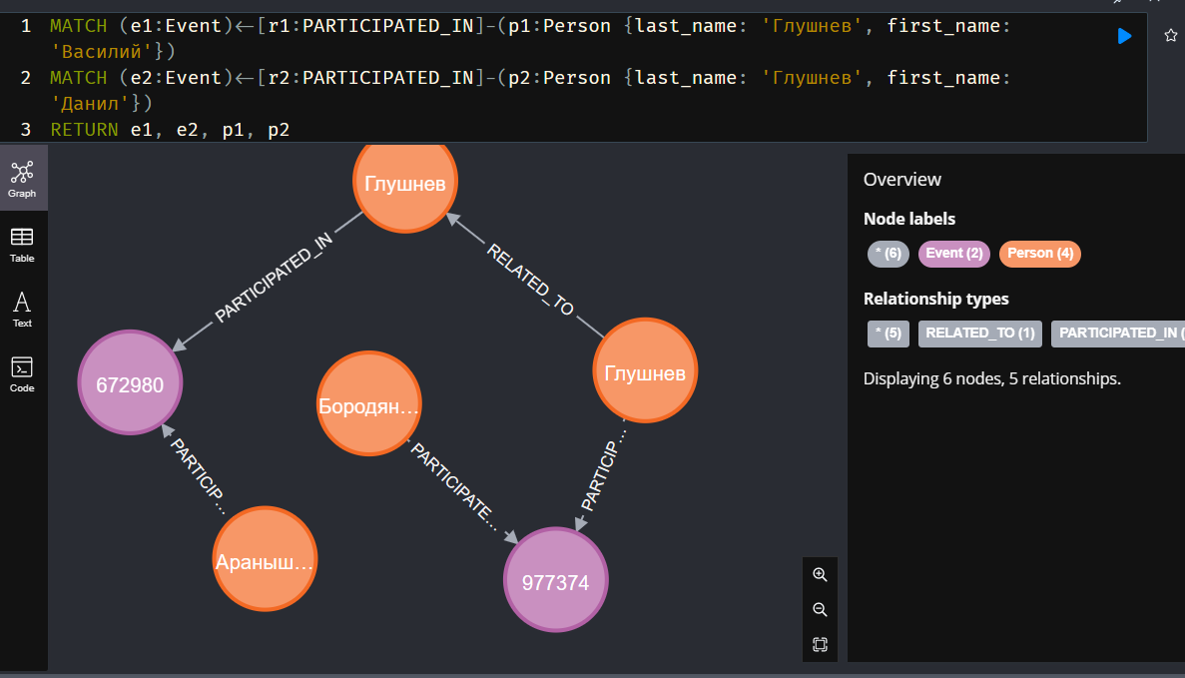

# **Создание связи между однофамильцами разного пола.**
Приемр: Абдулин - Абдулина

In [ ]:
from neo4j import GraphDatabase, basic_auth

# Подключение к базе данных
driver = GraphDatabase.driver(
  "neo4j://3.83.149.211:7687",
  auth=basic_auth("neo4j", "conveniences-chapters-amplifier"))

for pair in last_name_pairs:
    last_name1, last_name2 = pair
    
    with driver.session() as session:
        session.run(
            "MATCH (e1:Event)<-[r1:PARTICIPATED_IN]-(p1:Person {last_name: $last_name1}) \
MATCH (e2:Event)<-[r2:PARTICIPATED_IN]-(p2:Person {last_name: $last_name2}) \
CREATE (p1)-[:RELATED_TO]->(p2) \
RETURN e1, e2, p1, p2",
            last_name1=last_name1,
            last_name2=last_name2
        )


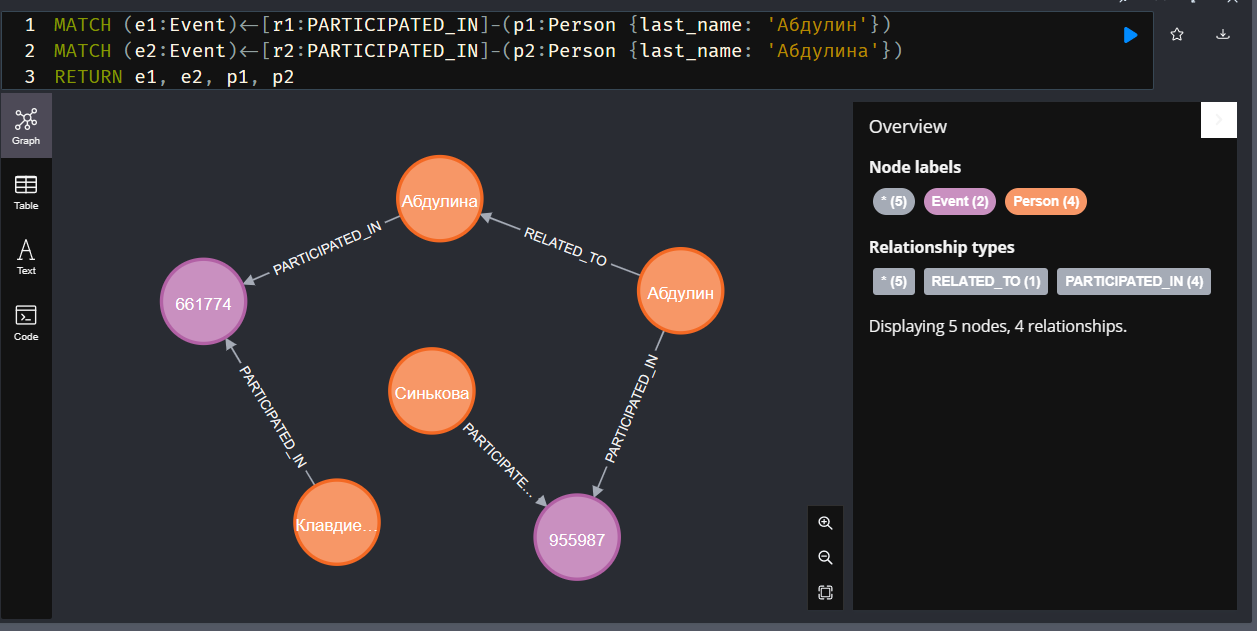

Запросы к базе данных Neo4j



In [ ]:
with driver.session() as session:
    session.run("MATCH (n) RETURN n LIMIT 15") #возвращает только первые 15 узлов

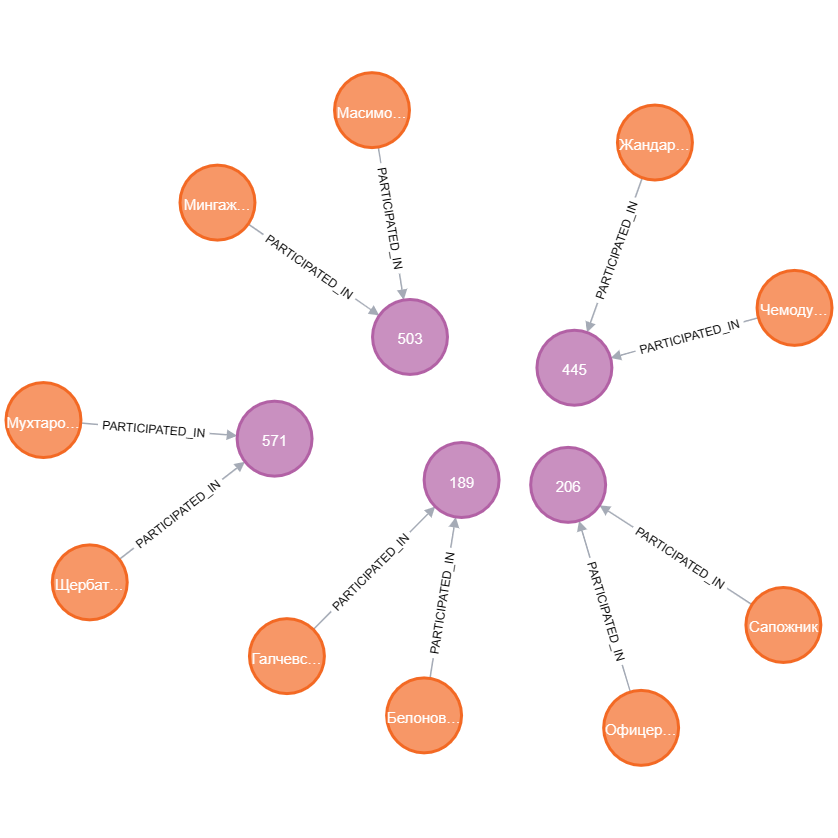

In [ ]:
with driver.session() as session:
    session.run("MATCH (n) RETURN count(n)") #вывести количество узлов (23511 в нашем случае)

In [ ]:
with driver.session() as session:
    session.run("MATCH (e:Event) WHERE e.id IN ['70049', '92995', '117280','177407', '358194'] MATCH (e)<-[:PARTICIPATED_IN]-(p:Person) RETURN e, p ") #отобразить те узлы, у который дублируются event_id


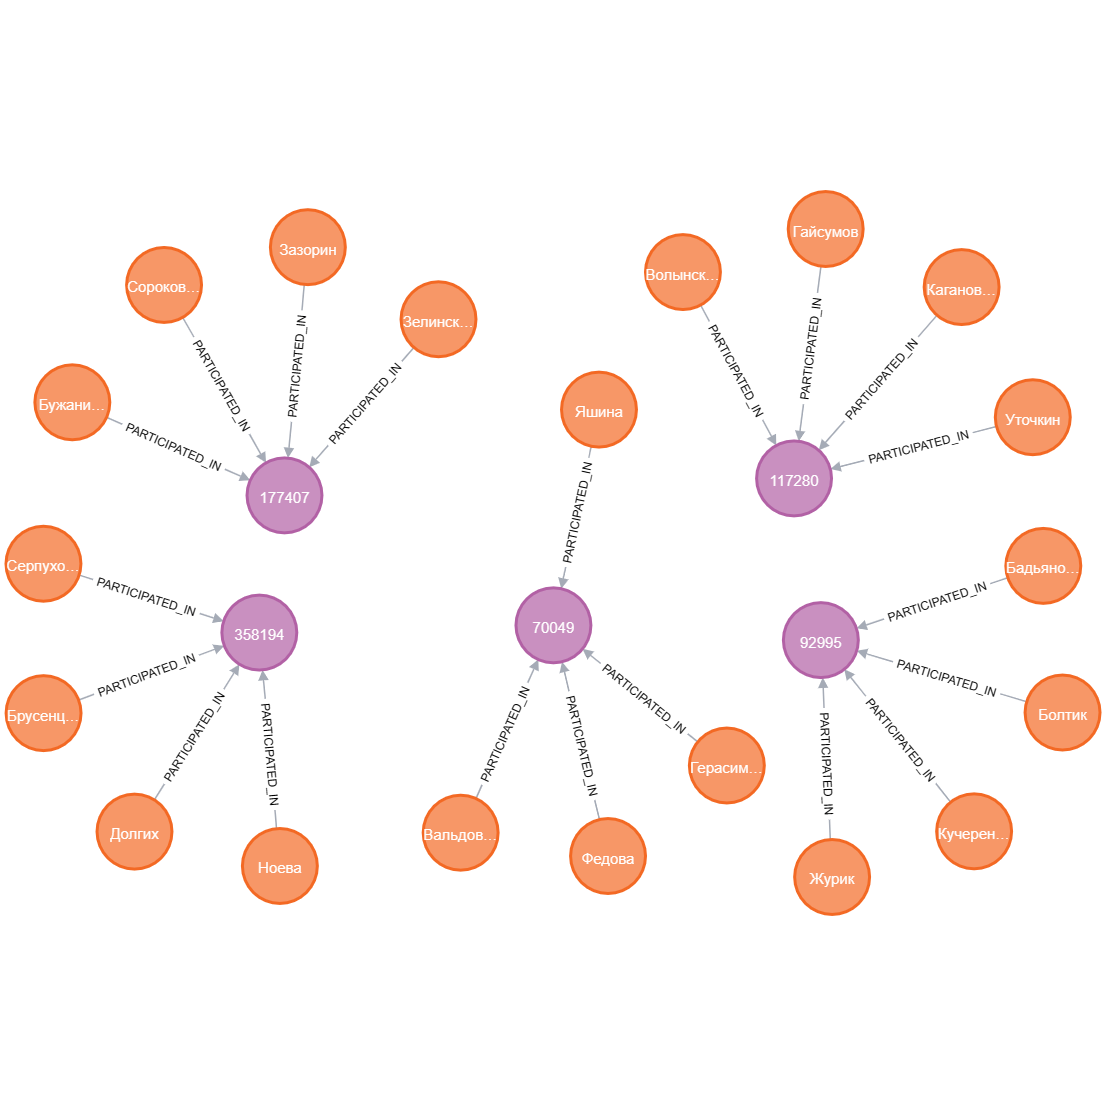

In [ ]:
with driver.session() as session:
    session.run("MATCH (person:Person)\
    WHERE person.last_name = 'Ахромеева'\
    RETURN person ") #отобразить те узлы, у которых фамлия Ахромеева (т.к. это наиболее встречающаяся фамили )

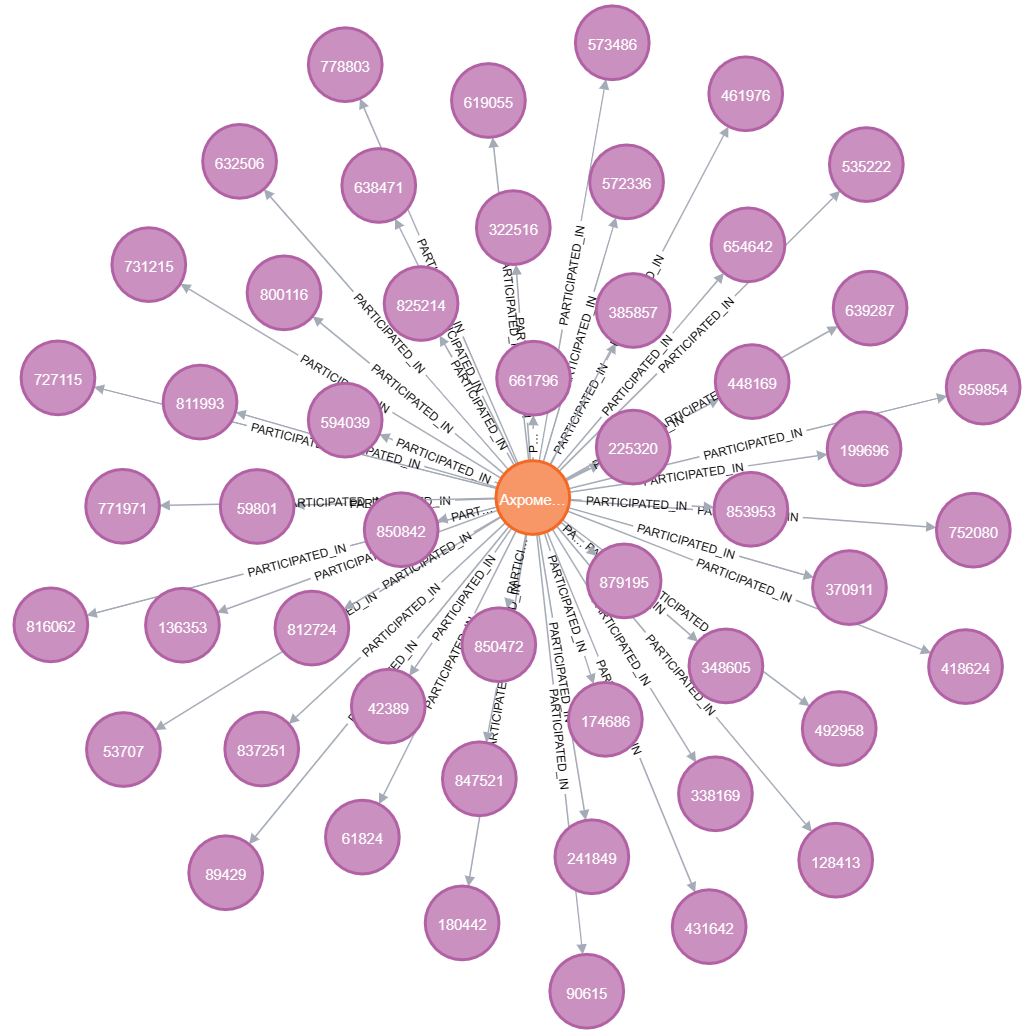

# **Поиск связанных персон в базе данных Neo4j и формирование JSON-ответа**

In [ ]:
from neo4j import GraphDatabase, basic_auth
import json

# Установить соединение с графовой БД Neo4j
driver = GraphDatabase.driver(
  "neo4j://3.83.149.211:7687",
  auth=basic_auth("neo4j", "conveniences-chapters-amplifier"))

# Этот запрос выбирает всех связанных персон, исключая человека с именем $fullname, а затем использует DISTINCT для вывода только уникальных имен.
def get_related(fullname):
    with driver.session() as session:
        result = session.run("MATCH (p:Person {fullname: $fullname})-[*]-(related:Person) \
        WHERE related.fullname <> $fullname \
        RETURN DISTINCT related.fullname as fullname",
                              fullname=fullname)

        # Собрать результаты запроса в список словарей
        data = []
        for record in result:
            data.append({
                "fullname": record["fullname"]
            })

        # Вывод в формате JSON (серилизация данных)
        json_data = json.dumps(data, ensure_ascii=False)
        print(json_data)

# Запросить у пользователя ввод fullname и для кажого полного именни, отображаем с кем связаны
while True:
    query = input("Введите запрос (или 'exit' для выхода): ")
    if query == "exit":
        break
    get_related(query)


Введите запрос (или 'exit' для выхода): Глушнева Оксана Анатольевна
[{"fullname": "Аранышева Ксения Ефимовна"}, {"fullname": "Глушнев Данил Егорович"}, {"fullname": "Эфиров Алексей Павлович"}, {"fullname": "Аранышев Игорь Ильич"}, {"fullname": "Леденев Эдуард Кириллович"}, {"fullname": "Глушнев Василий Рамилевич"}, {"fullname": "Бородянская Эльвира Ефимовна"}]
Введите запрос (или 'exit' для выхода): Глушнев Данил Егорович
[{"fullname": "Аранышева Ксения Ефимовна"}, {"fullname": "Глушнева Оксана Анатольевна"}, {"fullname": "Эфиров Алексей Павлович"}, {"fullname": "Аранышев Игорь Ильич"}, {"fullname": "Леденев Эдуард Кириллович"}, {"fullname": "Глушнев Василий Рамилевич"}, {"fullname": "Бородянская Эльвира Ефимовна"}]
Введите запрос (или 'exit' для выхода): exit
